## Text to Dataframe

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
with open('result.txt') as f:
    lines = f.read()
a = list(eval(lines))
col_head = ['first', 'second', 'third', 'fourth', 'fifth']
data = pd.DataFrame.from_records(a, columns=col_head)
data[:5]

,first,second,third,fourth,fifth
0,1,2,3,6,None
1,1,4,3,i,None
2,d,2,4,ro,None
3,L,3,4,None,None
4,t,3,4,6,None


## Data Cleaning

In [90]:
# filter column by ignoring value that counts less than 30
filtered_col = []
for col in col_head:
    filtered_col.append(
        (data[col].value_counts()[data[col].value_counts() > 30]).index)
filtered_col

[Index(['1', 'i', 'I', '2', 'd', '3', '4', 't'], dtype='object'),
 Index(['2', '4', '3', '5', 'P4', 'v4', '6', '74'], dtype='object'),
 Index(['3', '4', '5', '6', '7', '8', 'fo'], dtype='object'),
 Index(['8', '7', '4', '6', '5', 'fo', 'i'], dtype='object'),
 Index([], dtype='object')]

In [91]:
# because fifth column mostly consists of None, we can drop the column
data.drop('fifth', axis=1, inplace=True)
col_head.pop()
data

,first,second,third,fourth
0,1,2,3,6
1,1,4,3,i
2,d,2,4,ro
3,L,3,4,None
4,t,3,4,6
...,...,...,...,...
3013,,None,None,None
3014,1,3,4,7
3015,1,4,7,None
3016,,None,None,None


In [134]:
# continue ignoring value that counts less than 30
# we can do that by creating new dataframe
data_new = data.copy()
for i, col in enumerate(col_head):
    data_new = data_new[data_new[col].isin(filtered_col[i])]
data_new

,first,second,third,fourth
0,1,2,3,6
1,1,4,3,i
4,t,3,4,6
5,I,3,4,6
8,1,3,6,7
...,...,...,...,...
3010,i,4,5,8
3011,4,3,5,8
3012,1,3,5,8
3014,1,3,4,7


Now, take a glance at our columns value.

In [135]:
filtered_col

[Index(['1', 'i', 'I', '2', 'd', '3', '4', 't'], dtype='object'),
 Index(['2', '4', '3', '5', 'P4', 'v4', '6', '74'], dtype='object'),
 Index(['3', '4', '5', '6', '7', '8', 'fo'], dtype='object'),
 Index(['8', '7', '4', '6', '5', 'fo', 'i'], dtype='object'),
 Index([], dtype='object')]

As you can see, there's a lot of non-digit values and value that's nonsense ('74'). We will change those values to None, except from the 'first' column.

In the 'first' column, We can safely assume that 'i', 'I', and 't' is actually '1'. This is because the '1' looks very small on the screen, so the program couldn't recognize it really well.

So, in the first column, the only value that will be replaced by None is 'd'.

In [136]:
data_new['first'] = data_new['first'].str.replace('(i)|(I)|(t)', '1', regex=True).replace('d', None)

data_new['second'] = data_new['second'].replace(['P4', 'v4', '74'], None)
data_new['third'] = data_new['third'].replace('fo', None)
data_new['fourth'] = data_new['fourth'].replace(['fo', 'i'], None)

data_new.reset_index(inplace=True, drop=True)

# convert data to integer
data_new = data_new.astype(int)

In [137]:
data_new[:5]

,first,second,third,fourth
0,1,2,3,6
1,1,4,3,6
2,1,3,4,6
3,1,3,4,6
4,1,3,6,7
...,...,...,...,...
2028,1,4,5,8
2029,4,3,5,8
2030,1,3,5,8
2031,1,3,4,7


## Exploratory Data Analysis

In [138]:
# create new column: avg
# which indicates average of position at a time
data_new['avg'] = data_new.mean(numeric_only=True, axis=1)
data_new[:5]

,first,second,third,fourth,avg
0,1,2,3,6,3.00
1,1,4,3,6,3.50
2,1,3,4,6,3.50
3,1,3,4,6,3.50
4,1,3,6,7,4.25
...,...,...,...,...,...
2028,1,4,5,8,4.50
2029,4,3,5,8,5.00
2030,1,3,5,8,4.25
2031,1,3,4,7,3.75


In [140]:
data_new.describe()

,first,second,third,fourth,avg
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,1.223807,2.869651,4.206099,6.292671,3.648057
std,0.654770,1.014282,1.272948,1.454504,0.825829
min,1.000000,2.000000,3.000000,4.000000,2.500000
25%,1.000000,2.000000,3.000000,5.000000,3.000000
50%,1.000000,2.000000,4.000000,7.000000,3.500000
75%,1.000000,4.000000,5.000000,8.000000,4.250000
max,4.000000,6.000000,8.000000,8.000000,6.250000


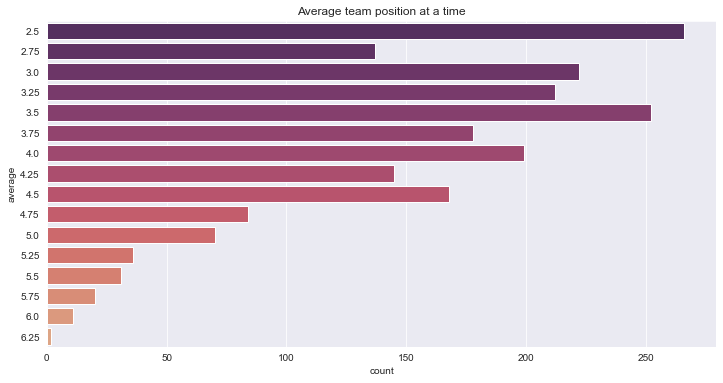

In [172]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))

sns.countplot(data=data_new, y='avg', palette="flare_r")
plt.title("Average team position at a time")
plt.ylabel("average")
plt.show()

In the following section, I will show countplot for each position (first, second, etc). Note that the 'first' position isn't necessarily the first player's actual position. This is due to the program could miss-recognize the first player's position.

For example, if we have this position: 1, 2, 3, 4

The program may not recognize the first place, so it will only record ['2', '3', '4', None, None]. Therefore, '2' isn't the first player's actual position.

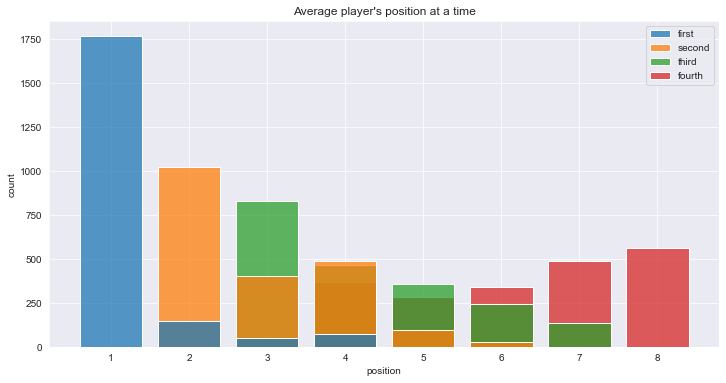

In [207]:
plt.figure(figsize=(12, 6))

bins = np.arange(1, 10) - 0.5
sns.histplot(data=data_new.loc[:, 'first':'fourth'], bins=bins, shrink=0.8)

plt.title("Average player's position at a time")
plt.ylabel("count")
plt.xlabel("position")
plt.legend()
plt.show()